In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Dibujar modelos

In [2]:
os.chdir('..')
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

In [5]:
modelo = tf.keras.models.load_model('cnn_model/tunning_save/best_model_0.7.h5', 
                                    custom_objects={'root_mean_squared_error': root_mean_squared_error})

In [6]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 20, 96)            576       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 96)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 480)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                30784     
                                                                 
 dense_3 (Dense)             (None, 24)                1560      
                                                                 
Total params: 32,920
Trainable params: 32,920
Non-trainable params: 0
__________________________________________________

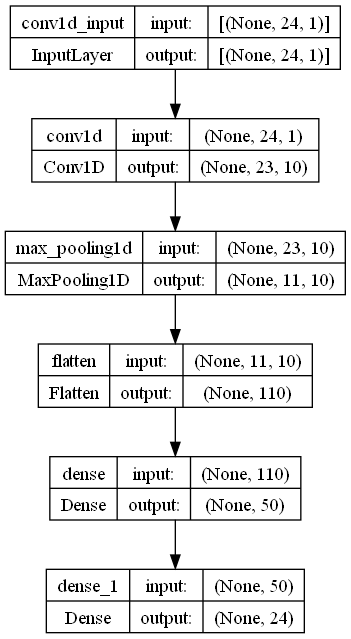

In [5]:
dot_img_file = 'cnn_model/bases_model/base.png'
tf.keras.utils.plot_model(modelo, to_file=dot_img_file, show_shapes=True)

In [6]:
pd.read_csv('cnn_model/bases_model/df_results_bases.csv')

,Unnamed: 0,trainig_size,model,type,training_time,prediction_time,rmse_trainig,rmse_validation,rmse_test,mean_MAE,r2,mean_RMSE,mean_MAPE,mean_rMAE
0,0,0.7,cnn,base,55.079787,1.848856,0.015293,0.022583,0.026452,27.738144,0.890495,53.208902,12.397764,3.083422
1,1,0.8,cnn,base,87.598425,2.277467,0.014995,0.028389,0.025722,26.890531,0.896523,51.724993,12.262885,2.989081
2,2,0.9,cnn,base,92.577044,1.340297,0.016557,0.017137,0.034942,36.230413,0.870313,65.642647,15.006476,2.972386


In [17]:
pd.read_csv('cnn_model/tunning_save/df_results_best.csv')

,Unnamed: 0.1,Unnamed: 0,trainig_size,model,type,prediction_time,rmse_trainig,rmse_validation,rmse_test,mean_MAE,r2,mean_RMSE,mean_MAPE,mean_rMAE,architecture,training_time
0,0,0,0.7,cnn,tunning,2.155071,0.014753,0.019449,0.024197,25.760798,0.917049,46.310251,13.153035,2.863617,"[(96, 'filters'), (5, 'kernel_size'), (4, 'poo...",260.732038
1,0,0,0.8,cnn,tunning,4.783218,0.014622,0.024668,0.023930,24.560300,0.917233,46.260159,11.353695,2.730058,"[(32, 'filters'), (3, 'kernel_size'), (2, 'poo...",489.633888
2,0,0,0.9,cnn,tunning,1.393467,0.016490,0.017285,0.031407,32.107211,0.900648,57.454743,14.413635,2.634114,"[(96, 'filters'), (3, 'kernel_size'), (2, 'poo...",267.271565
